In [2]:
import imp 

import os
import sys

import networkx as nx
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString,Point
import numpy as np


import matplotlib.pyplot as plt
import bokeh as bh

from datetime import datetime

%load_ext autoreload
%autoreload 2
import taxi_driver.taxi_driver as td

import plotly.express as px


In [3]:
#setting some much needed paths 

dataPath = os.path.join("data")
csvPath  = os.path.join(dataPath,"CSV")
shpPath  = os.path.join(dataPath,"SHP")

outputPath = os.path.join("outputs")
imagePath = os.path.join(outputPath,"images")



In [52]:
zoneShpPath = os.path.join(shpPath,"taxi_zones.shp")

#combine in one
# march_path = os.path.join(csvPath,"march_data.csv")
# june_path = os.path.join(csvPath,"june_data.csv")
# nov_path = os.path.join(csvPath,"november_data.csv")

# taxi_df=td.Taxidf([march_path,june_path,nov_path],sample_fraction=0.2,taxi_zones_shp_path=zoneShpPath)
#taxi_df.convert_dates()

#save the combined sample df
# csv_sample_path = os.path.join(csvPath,"sample_csv.csv")
# taxi_df.taxi_data.to_csv(csv_sample_path)
#---------------------------------------------------

#load the sample
csv_sample_path = os.path.join(csvPath,"sample_csv.csv")
taxi_df=td.Taxidf(csv_sample_path,taxi_zones_shp_path=zoneShpPath)

### Temporal distribution

/home/itoumpalidis/anaconda3/envs/ox/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



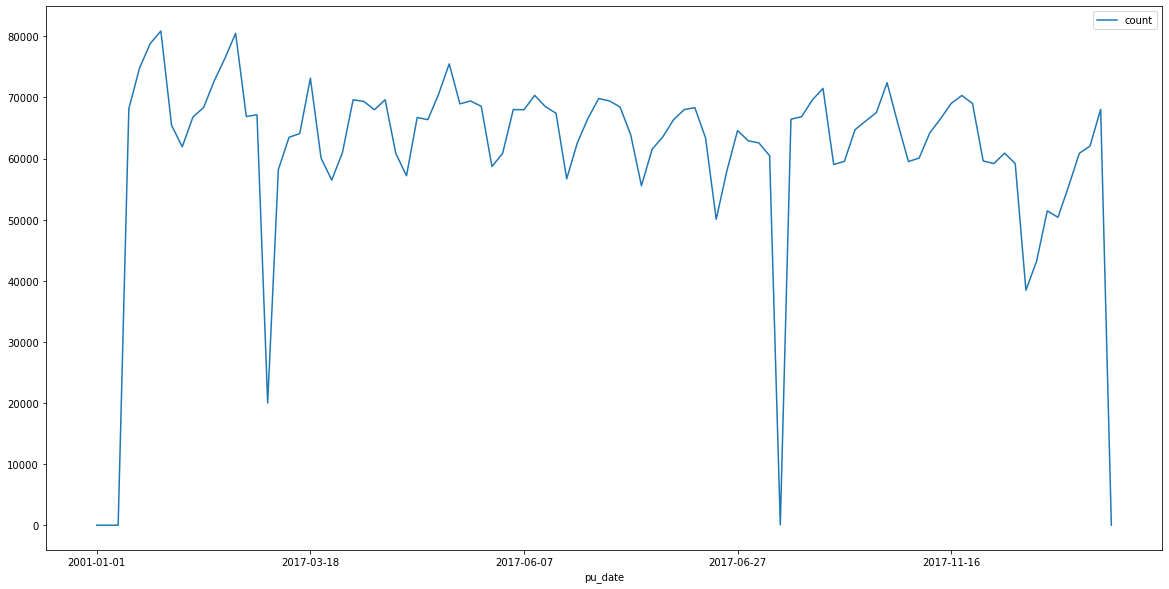

In [53]:
fig,ax = plt.subplots(figsize=(20,10))

taxi_df.grouped_date().plot(ax=ax)

fileName = os.path.join(imagePath,"entire_ts_monthly")
plt.savefig(fileName)

In [54]:
#remove unwanted months
taxi_df.taxi_data=taxi_df.taxi_data.loc[taxi_df.taxi_data['pu_month'].isin([3,6,11])]


In [67]:
#will remove the day of the storm 
remove_dates=["2017-03-14","2017-06-25","2017-11-23","2017-11-24","2017-11-25","2017-11-26"]

for rd in remove_dates:
    sample_df = taxi_df.taxi_data[taxi_df.taxi_data['pu_date']!=rd]
    sample_df = sample_df[sample_df['do_date']!=rd]
    taxi_df.taxi_data = sample_df

In [68]:

fig = px.line(taxi_df.grouped_date(), y="count")
fig.show()

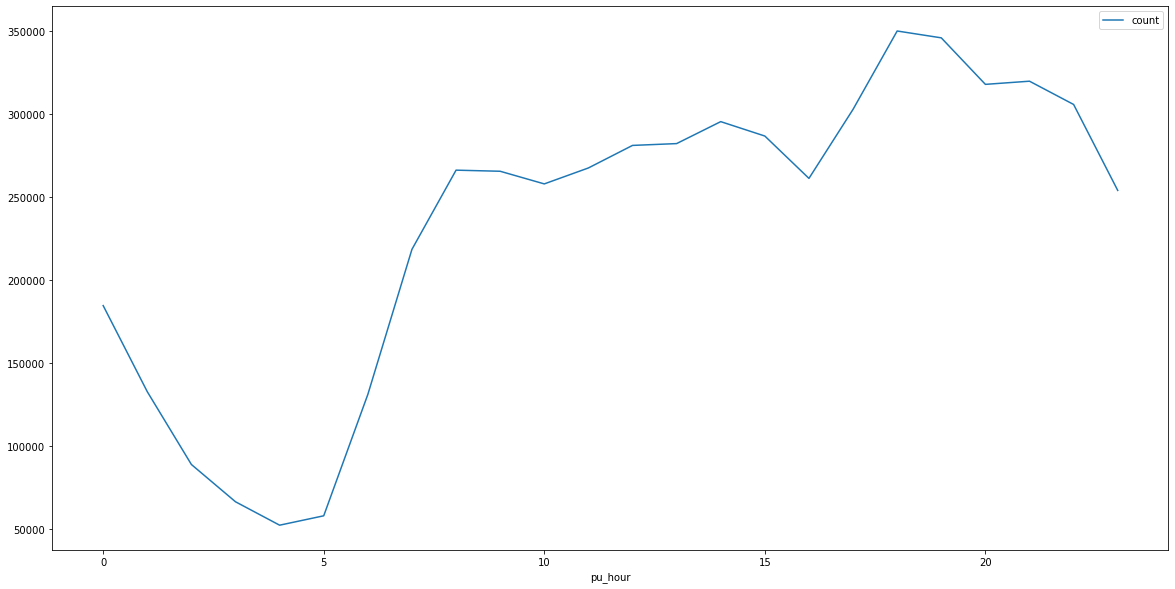

In [77]:
fig,ax = plt.subplots(figsize=(20,10))

taxi_df.grouped_hour().plot(ax=ax)

fileName = os.path.join(imagePath,"sample_ts_hourly.png")
plt.savefig(fileName)

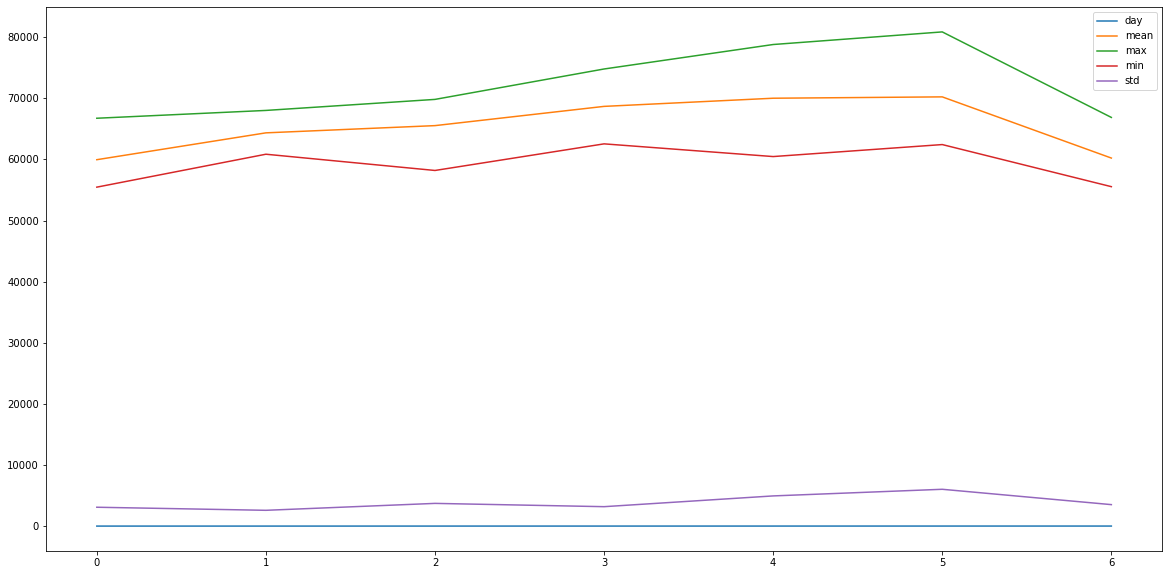

In [70]:
fig,ax = plt.subplots(figsize=(20,10))

taxi_df.count_grouped_weekday().plot(ax=ax)

fileName = os.path.join(imagePath,"sample_ts_weekday")
plt.savefig(fileName)

### Spatial Distribution

In [71]:
taxi_df.compute_taxi_zones()

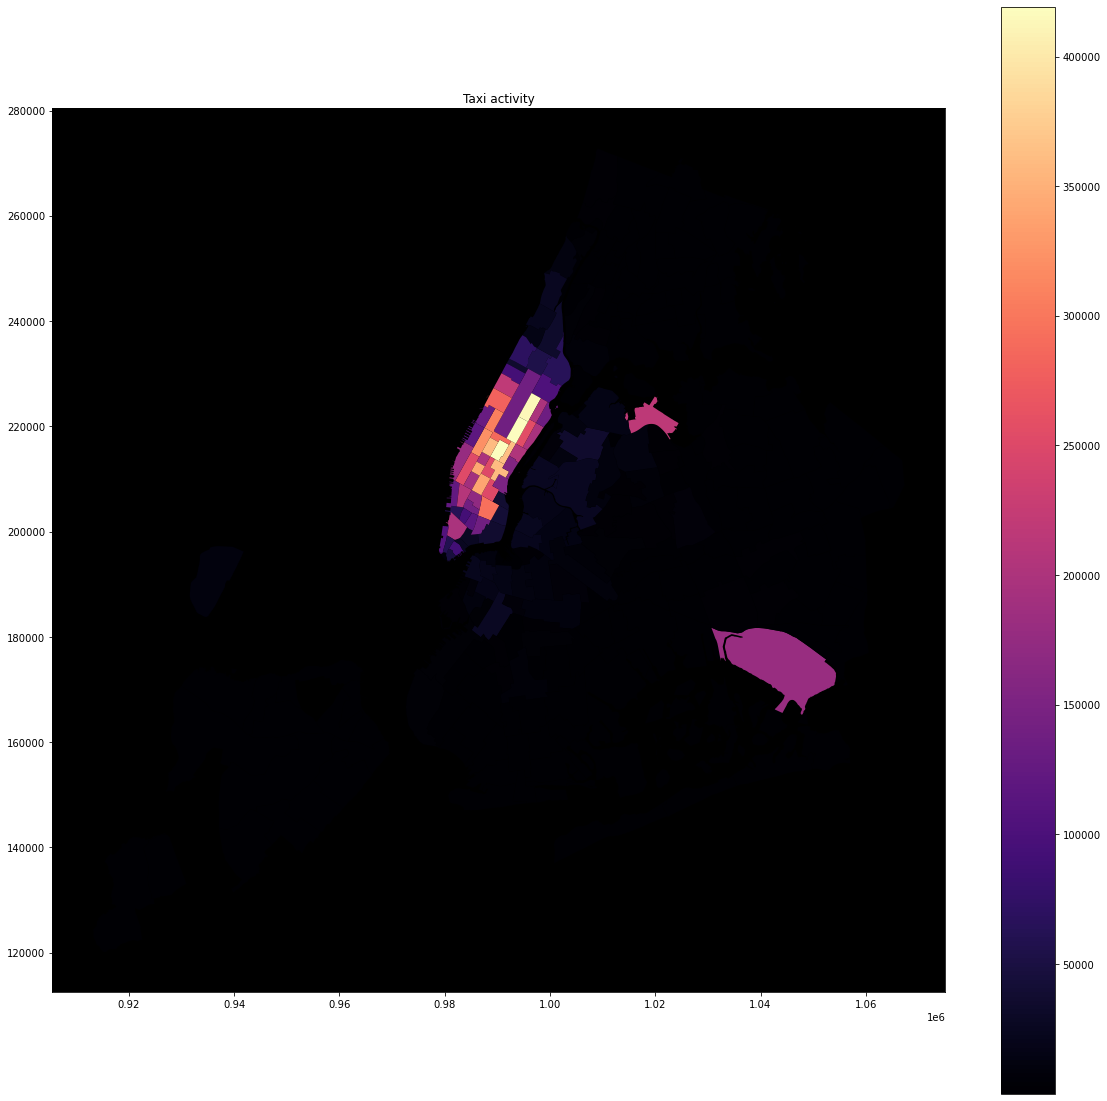

In [73]:
fig,ax = plt.subplots(figsize=(20,20))
ax.set_aspect("equal")
ax.set_facecolor("black")
taxi_df.taxi_zones.plot(column='taxi_activity', cmap='magma',ax=ax,legend=True)
ax.set_title("Taxi activity")

filePath = os.path.join(outputPath,"images","sample_spatial_count")
plt.savefig(filePath)

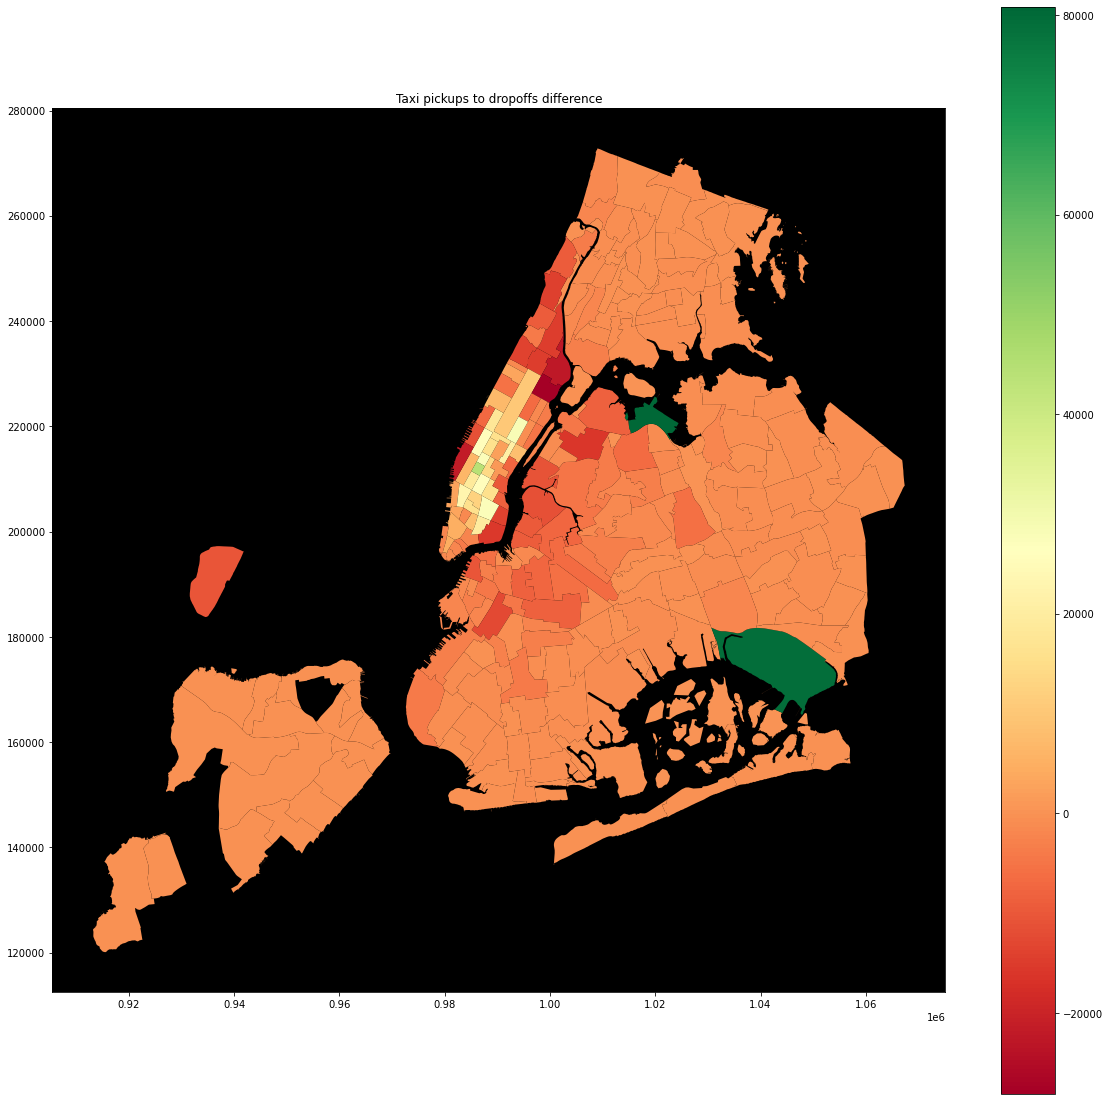

In [75]:
fig,ax = plt.subplots(figsize=(20,20))
ax.set_aspect("equal")
ax.set_facecolor("black")
taxi_df.taxi_zones.plot(column='taxi_demand', cmap='RdYlGn',ax=ax,legend=True)
ax.set_title("Taxi pickups to dropoffs difference")

filePath = os.path.join(outputPath,"images","sample_demand")
plt.savefig(filePath)

In [78]:
import plotly.express as px


fig = px.scatter(taxi_df.taxi_zones, x="PULocationID", y="DOLocationID", text="zone",color="taxi_demand_class")

fig.add_shape(
        # Line Diagonal
            type="line",
            x0=0,
            y0=0,
            x1=600000,
            y1=600000,
            line=dict(
                color="MediumPurple",
                width=4,
                dash="dot",
            )
)



fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='Taxi pickups to drop-offs'
)

fig.show()

### Feature Analysis

In [81]:
taxi_df.taxi_data.describe().astype(int)

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,pu_month,do_month
count,5591791,5591791,5591791,5591791,5591791,5591791,5591791,5591791,5591791,5591791,5591791
mean,2,13,0,0,1,0,0,16,4768358,6,6
std,3,266,0,0,2,1,0,267,2838368,3,3
min,0,-550,-42,0,-11,-15,0,-550,2,3,3
25%,0,6,0,0,0,0,0,8,2327135,3,3
50%,1,9,0,0,1,0,0,11,4658592,6,6
75%,3,15,0,0,2,0,0,17,7023474,11,11
max,733,630461,69,103,450,990,1,630463,10294622,11,12


In [109]:
sample_df=taxi_df.taxi_data

In [ ]:
sample_df['']

In [ ]:
#cleaning
taxi_df=taxi_df.taxi_data[taxi_df.taxi_data['fare_amount']>0]
taxi_df=taxi_df[taxi_df['fare_amount']<2000]
taxi_df=taxi_df[taxi_df['trip_distance']>0]
taxi_df=taxi_df[taxi_df['trip_distance']>0]


<AxesSubplot:>

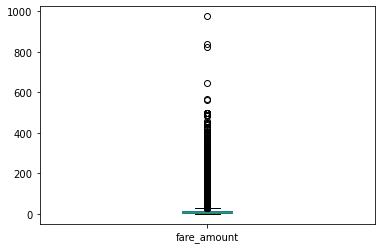

In [108]:

taxi_df.taxi_data['fare_amount'].plot.box()

In [92]:
over_200 = taxi_df.taxi_data[taxi_df.taxi_data['fare_amount']>200]

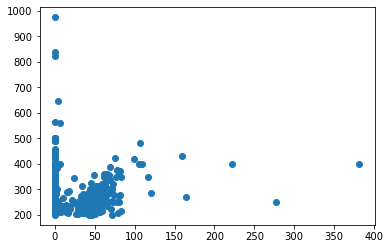

In [96]:
plt.scatter(over_200['trip_distance'],over_200['fare_amount'])

In [107]:
over_200[over_200['trip_distance']<1].describe()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,pu_month,do_month
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000
mean,0.053284,301.297214,0.009950,0.179104,22.619701,1.229403,0.288060,325.623433,4.857145e+06,6.388060,6.388060
std,0.170752,107.928528,0.099501,0.240336,29.446038,4.266509,0.058794,109.240692,2.777525e+06,3.078743,3.078743
min,0.000000,200.200000,0.000000,0.000000,0.000000,0.000000,0.000000,201.000000,1.237300e+04,3.000000,3.000000
25%,0.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.300000,251.060000,2.789011e+06,3.000000,3.000000
50%,0.000000,264.000000,0.000000,0.000000,5.000000,0.000000,0.300000,294.800000,4.660112e+06,6.000000,6.000000
75%,0.000000,337.700000,0.000000,0.500000,43.360000,0.000000,0.300000,390.960000,7.244320e+06,11.000000,11.000000
max,0.950000,975.000000,1.000000,0.500000,150.000000,25.560000,0.300000,975.300000,1.029460e+07,11.000000,11.000000


In [ ]:
#will keep only the payment checks
clean_df = clean_df[clean_df['payment_type']==1]